## Report 1

## Title: The changes of investment trends from 2000 to 2013

## Main dataset: Startup investments

# Summary:
    The research aims in analyzing the trend of changing of investing preference of investors. 

In [51]:
pip install -q nbconvert


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install -q pyppeteer



[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install -q qeds


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

import qeds
import seaborn as sns

In [55]:
investments = pd.read_csv("/Users/zzybollar/Downloads/archive/investments.csv")

In [56]:
funds = pd.read_csv("/Users/zzybollar/Downloads/archive/funds.csv")
funds['funded_at'] = pd.to_datetime(funds['funded_at'], errors='coerce')

start_date = "2000-01-01"
end_date = "2013-12-31"

funding_data = funds[(funds['funded_at'] >= start_date) & (funds['funded_at'] <= end_date)].copy()
funding_data = funding_data[["id", "fund_id", "object_id", "name", "funded_at", "raised_amount", "raised_currency_code"]]
funding_data.dropna(subset=["raised_amount"], inplace=True)
funding_data["raised_amount_log"] = np.log1p(funding_data["raised_amount"])
funding_data.reset_index(drop=True, inplace=True)
funding_data


,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code,raised_amount_log
0,1,1,f:371,Second Fund,2008-12-16,300000000.0,USD,19.519293
1,4,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,200750000.0,USD,19.117571
2,5,5,f:951,Tenth fund,2008-08-11,650000000.0,USD,20.292483
3,7,7,f:519,Third fund,2008-05-20,200000000.0,USD,19.113828
4,8,8,f:1811,Inventus Capital Partners Fund I LP,2007-11-30,51750000.0,USD,17.761935
...,...,...,...,...,...,...,...,...
1414,1697,1697,f:101,Fund V,2013-12-11,150000000.0,USD,18.826146
1415,1698,1698,f:7331,JANVEST Technologies LP I,2013-03-19,5.0,USD,1.791759
1416,1699,1699,f:7791,Fund II,2013-12-11,5000000.0,USD,15.424949
1417,1700,1700,f:15091,Fund I,2013-12-11,1100000.0,USD,13.910822


In [57]:
investments = pd.read_csv("/Users/zzybollar/Downloads/archive/investments.csv")

In [58]:
investments = investments[["id", "investor_object_id"]]

In [59]:
merged_data = funding_data.merge(investments, on="id", how="left")
merged_data.dropna(subset=["investor_object_id"], inplace=True)
merged_data.reset_index(drop=True, inplace=True)
merged_data

,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code,raised_amount_log,investor_object_id
0,1,1,f:371,Second Fund,2008-12-16,300000000.0,USD,19.519293,f:1
1,4,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,200750000.0,USD,19.117571,f:1
2,5,5,f:951,Tenth fund,2008-08-11,650000000.0,USD,20.292483,f:5
3,7,7,f:519,Third fund,2008-05-20,200000000.0,USD,19.113828,f:3181
4,8,8,f:1811,Inventus Capital Partners Fund I LP,2007-11-30,51750000.0,USD,17.761935,f:3
...,...,...,...,...,...,...,...,...,...
1414,1697,1697,f:101,Fund V,2013-12-11,150000000.0,USD,18.826146,f:857
1415,1698,1698,f:7331,JANVEST Technologies LP I,2013-03-19,5.0,USD,1.791759,f:55
1416,1699,1699,f:7791,Fund II,2013-12-11,5000000.0,USD,15.424949,f:55
1417,1700,1700,f:15091,Fund I,2013-12-11,1100000.0,USD,13.910822,f:227


In [60]:
objects = pd.read_csv("/Users/zzybollar/Downloads/archive/objects.csv")
objects = objects[["id", "entity_type","name", "category_code"]]
objects['id'] = objects['id'].str.extract('(\d+)').astype(int)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/var/folders/lh/v36j2zlj0t9_xqpxcj3l9qfw0000gn/T/ipykernel_47165/1222048858.py:3: SyntaxWarning: invalid escape sequence '\d'
  objects['id'] = objects['id'].str.extract('(\d+)').astype(int)
/var/folders/lh/v36j2zlj0t9_xqpxcj3l9qfw0000gn/T/ipykernel_47165/1222048858.py:1: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects = pd.read_csv("/Users/zzybollar/Downloads/archive/objects.csv")


In [61]:
final_data = merged_data.merge(objects, on="id", how="left")
final_data.dropna(subset=["category_code"], inplace=True)
final_data.reset_index(drop=True, inplace=True)
final_data

,id,fund_id,object_id,name_x,funded_at,raised_amount,raised_currency_code,raised_amount_log,investor_object_id,entity_type,name_y,category_code
0,1,1,f:371,Second Fund,2008-12-16,3.000000e+08,USD,19.519293,f:1,Company,Wetpaint,web
1,4,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,2.007500e+08,USD,19.117571,f:1,Company,Digg,news
2,5,5,f:951,Tenth fund,2008-08-11,6.500000e+08,USD,20.292483,f:5,Company,Facebook,social
3,7,7,f:519,Third fund,2008-05-20,2.000000e+08,USD,19.113828,f:3181,Company,Omnidrive,network_hosting
4,8,8,f:1811,Inventus Capital Partners Fund I LP,2007-11-30,5.175000e+07,USD,17.761935,f:3,Company,Postini,web
...,...,...,...,...,...,...,...,...,...,...,...,...
1160,1692,1692,f:15050,SJC II,2013-12-10,1.500000e+09,USD,21.128731,f:160,Company,SimulScribe,web
1161,1694,1694,f:9985,Bee Partners I,2011-10-21,0.000000e+00,USD,0.000000,f:430,Company,Pinger,messaging
1162,1695,1695,f:7025,H.I.G. Middle Market LBO Fund II LP,2013-12-10,1.600000e+09,USD,21.193269,f:42,Company,Delve Networks,games_video
1163,1696,1696,f:15068,Fund II,2013-12-11,3.500000e+08,USD,19.673444,f:430,Company,Xanga,web


In [81]:
final_data["funded_at"] = pd.to_datetime(final_data["funded_at"])
final_data["year"] = final_data["funded_at"].dt.year


/var/folders/lh/v36j2zlj0t9_xqpxcj3l9qfw0000gn/T/ipykernel_47165/808162172.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


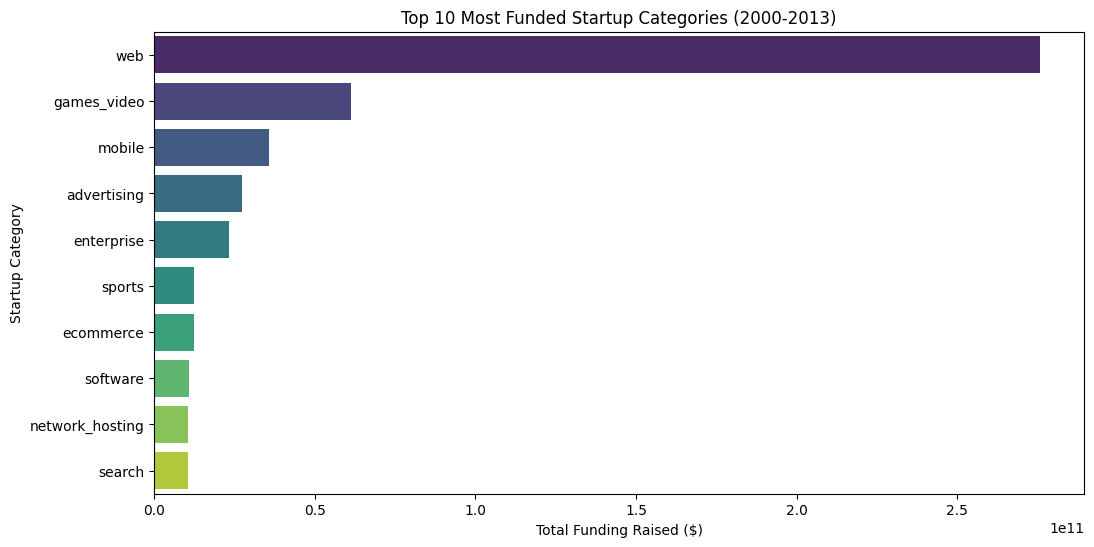

In [82]:
plt.figure(figsize=(12, 6))
top_categories = final_data.groupby("category_code")["raised_amount"].sum().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title("Top 10 Most Funded Startup Categories (2000-2013)")
plt.xlabel("Total Funding Raised ($)")
plt.ylabel("Startup Category")
plt.show()

In [92]:
industry_trends = final_data.groupby(["category_code", "year"])["raised_amount"].sum().reset_index()

top_5_industries = industry_trends.groupby("category_code")["raised_amount"].sum().nlargest(5).index
industry_trends = industry_trends[industry_trends["category_code"].isin(top_5_industries)]

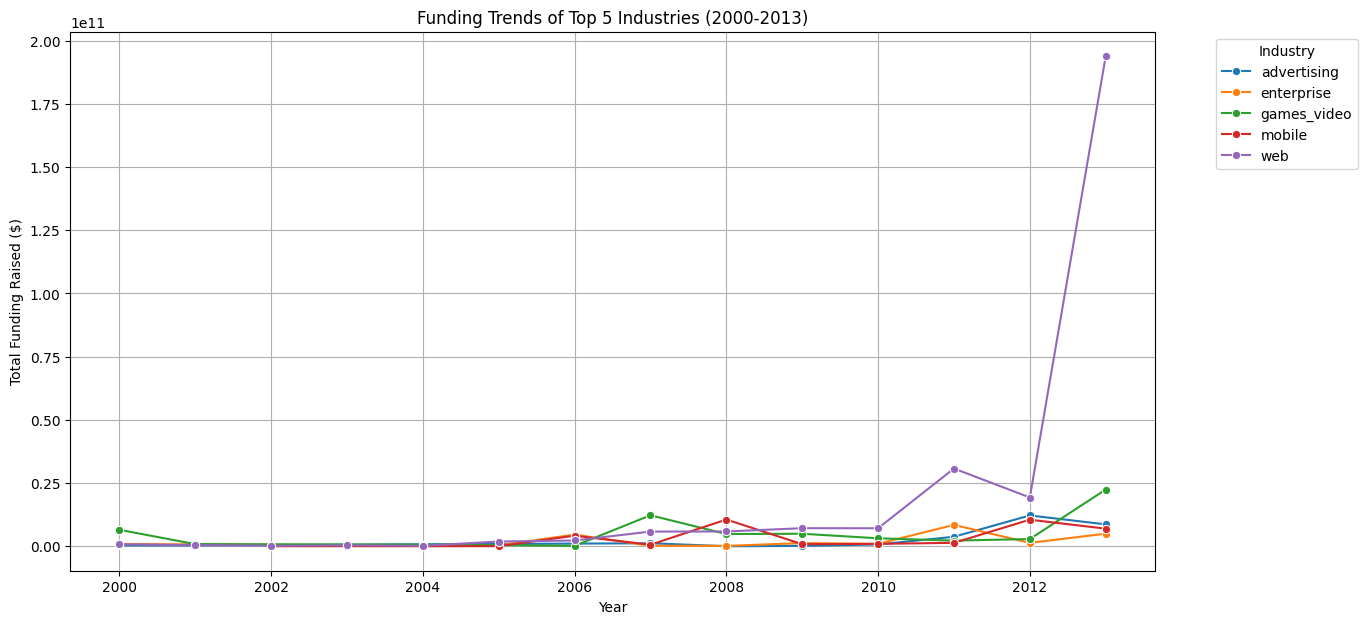

In [93]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=industry_trends, x="year", y="raised_amount", hue="category_code", marker="o")

plt.title("Funding Trends of Top 5 Industries (2000-2013)")
plt.xlabel("Year")
plt.ylabel("Total Funding Raised ($)")
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

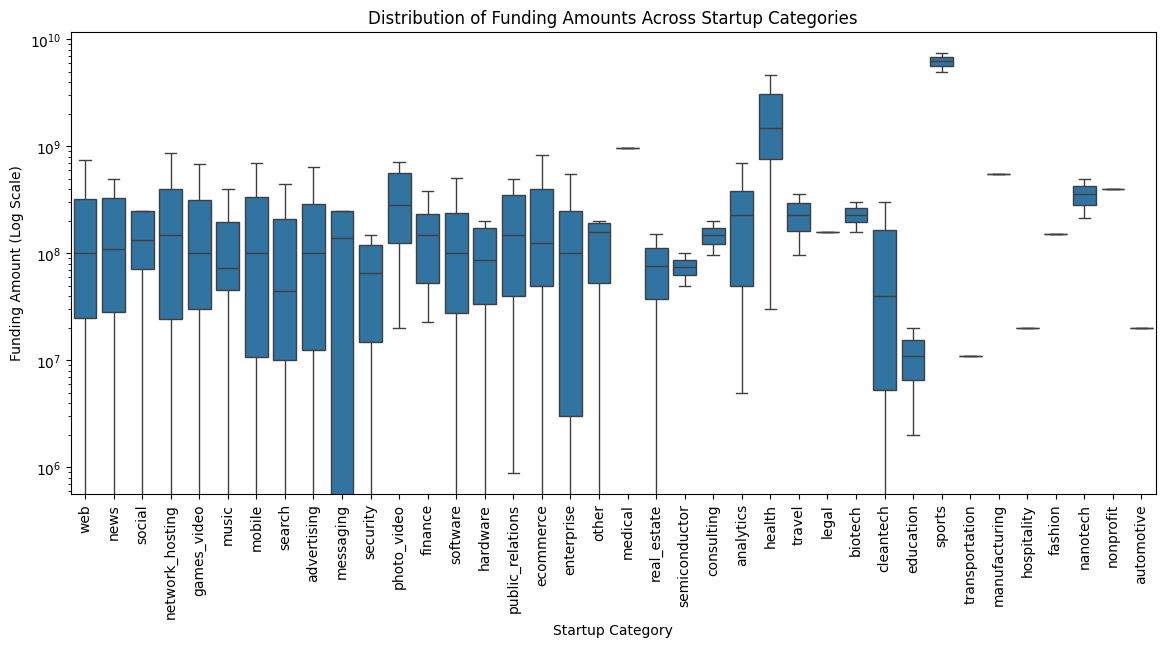

In [85]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="category_code", y="raised_amount", data=final_data, showfliers=False)
plt.xticks(rotation=90)
plt.yscale("log") 
plt.title("Distribution of Funding Amounts Across Startup Categories")
plt.xlabel("Startup Category")
plt.ylabel("Funding Amount (Log Scale)")
plt.show()

In [90]:
industry_totals = final_data.groupby("category_code")["raised_amount"].sum().reset_index()
top_10_industries = industry_totals.nlargest(10, "raised_amount")


In [119]:
investor_summary = final_data.groupby("investor_object_id")["raised_amount_log"].sum().reset_index()
top_10_investors = investor_summary.nlargest(10, "raised_amount_log")
objects["id"] = objects["id"].astype(str)
top_10_investors = top_10_investors.merge(objects, left_on="investor_object_id", right_on="id", how="left")
top_10_investors.drop(columns=["id","entity_type","name","category_code"], inplace=True)
top_10_investors

,investor_object_id,raised_amount_log
0,f:17,646.822153
1,f:26,442.968119
2,f:3181,390.798980
3,f:4,380.072100
4,f:29,372.629313
5,f:48,314.508059
6,f:18,299.198228
7,f:13,283.173694
8,f:12,266.756755
9,f:41,248.670535


In [120]:
investment_summary = final_data.groupby('investor_object_id')['raised_amount_log'].sum().reset_index()
top_5_investors = investment_summary.sort_values(by='raised_amount_log', ascending=False).head(5)

top_investors_data = final_data[final_data['investor_object_id'].isin(top_5_investors['investor_object_id'])]

industry_summary = top_investors_data.groupby(['investor_object_id', 'year', 'category_code'])['raised_amount_log'].sum().unstack(fill_value=0)

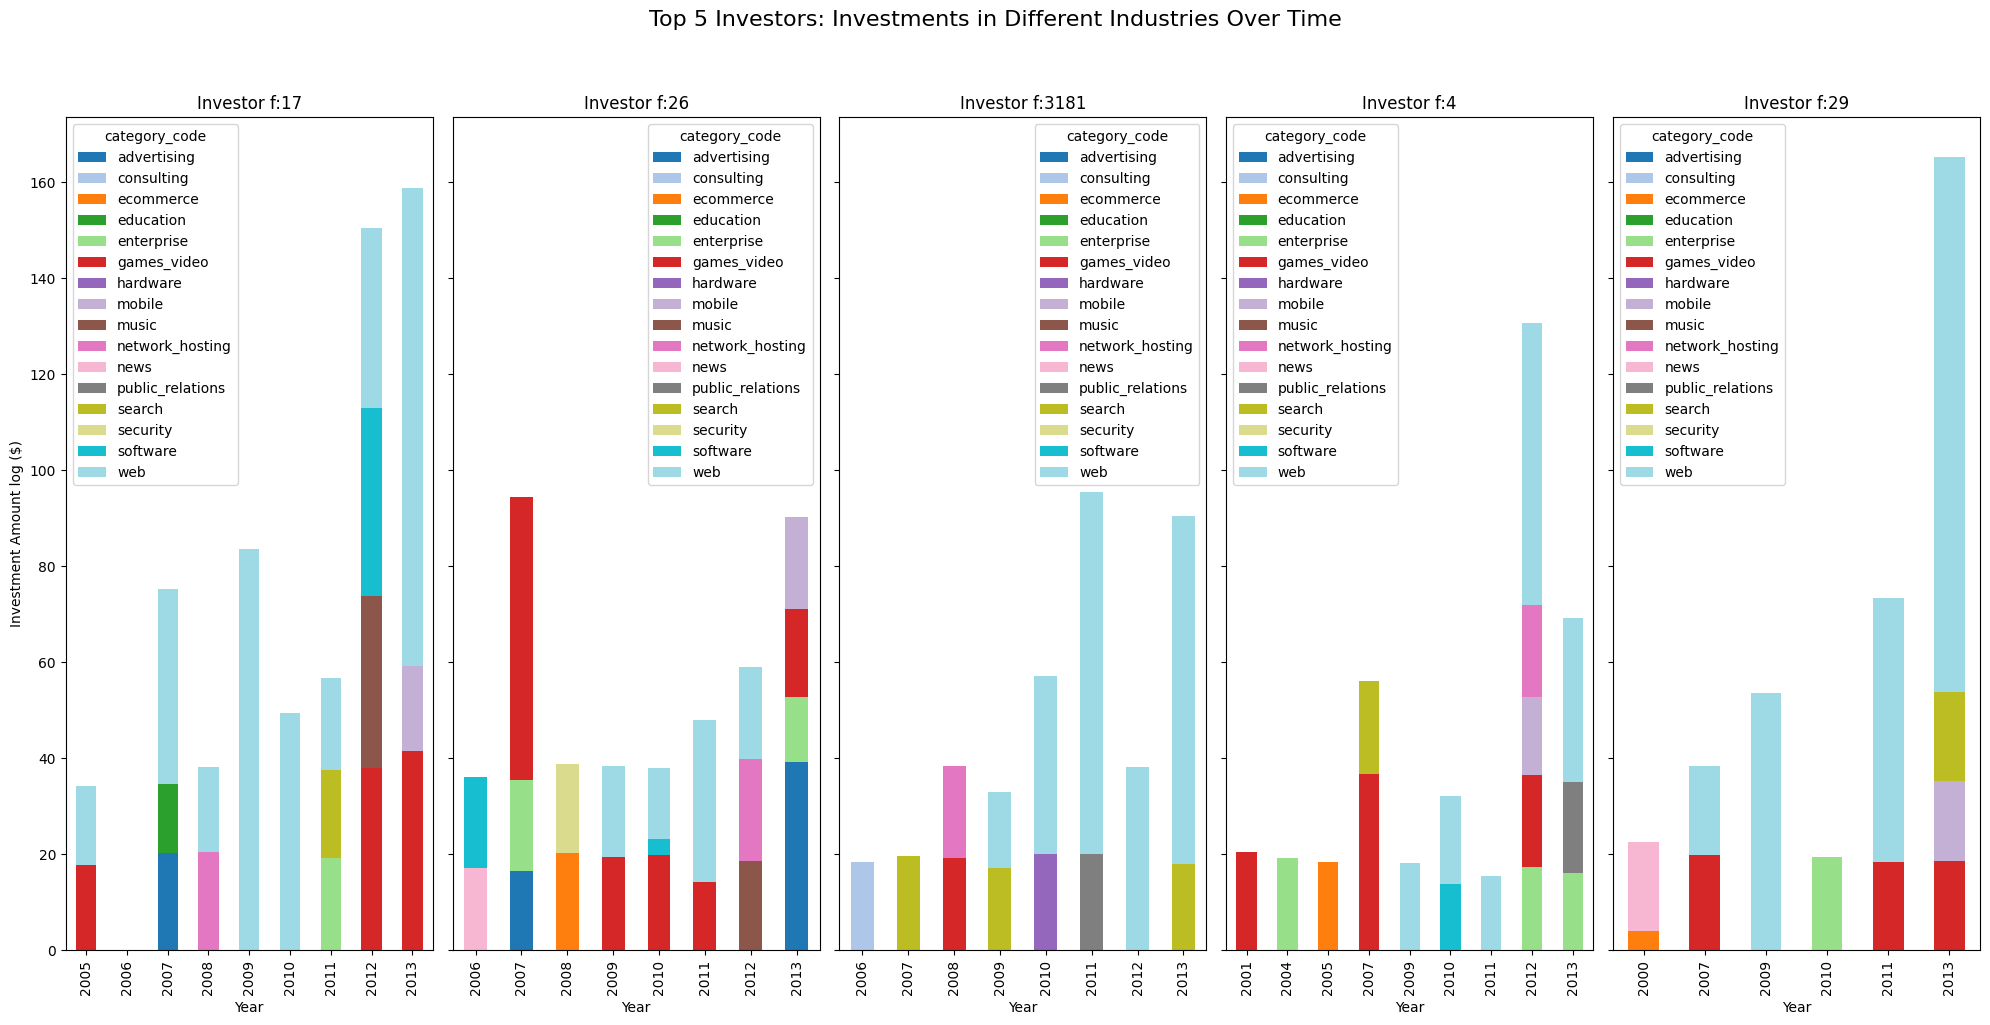

In [122]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10), sharey=True)

for i, investor_id in enumerate(top_5_investors['investor_object_id']):
    ax = axes[i]
    
    investor_data = industry_summary.loc[investor_id]
    
    investor_data.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
    
    ax.set_title(f"Investor {investor_id}")
    ax.set_xlabel('Year')
    ax.set_ylabel('Investment Amount log ($)')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to make room for the suptitle

plt.suptitle('Top 5 Investors: Investments in Different Industries Over Time', fontsize=16, y=1.02)

plt.show()